In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Taller 3

Por:

- Pinzón, Angela
- Yañez, Andrés

## Punto 1: Interpolación lineal bidimensional

Consideramos un plano cuya ecuación es $z = P(x, y) = A + Bx + Cy$, que pasa por tres puntos dados: $(x_0, y_0, z_0)$, $(x_1, y_1, z_1)$ y $(x_2, y_2, z_2)$. Los coeficientes $A$, $B$ y $C$ son la solución del siguiente sistema lineal:

\begin{align*}
A + Bx_0 + Cy_0 &= z_0 \\
A + Bx_1 + Cy_1 &= z_1 \\
A + Bx_2 + Cy_2 &= z_2
\end{align*}

Determinar los valores de $A$, $B$, y $C$ de tal manera que $z = P(x, y)$ pase por los puntos $(1, 1, 5)$, $(2, 1, 3)$ y $(1, 2, 9)$.

### Desarrollo:

- Para el punto $(1, 1, 5)$ tenemos $A + B(1) + C(1) = 5$
- Para el punto $(2, 1, 3)$ tenemos $A + B(2) + C(1) = 3$
- Para el punto $(1, 1, 5)$ tenemos $A + B(1) + C(2) = 9$

Tal que...

\begin{align*}
A + 1B + 1C &= 5 \\
A + 2B + 1C &= 3\\
A + 1B + 2C &= 9
\end{align*}


In [46]:
A = np.array([[1, 1, 1],
            [1, 2, 1],
            [1, 1, 2]])

b = np.array([5, 3, 9])

X = np.linalg.solve(A, b)

print("A =", X[0])
print("B =", X[1])
print("C =", X[2])

A = 3.0
B = -2.0
C = 4.0


#### 

## Punto 2: Interpoladores polinomiales

En la siguiente tabla se muestran temperaturas que fueron medidas cada hora, durante un lapso total de 5 horas:

| Horas | Grados (C) |
|-------|------------|
| 13    | 18         |
| 14    | 18         |
| 15    | 17         |
| 16    | 16         |
| 17    | 15         |
| 18    | 14         |

1. Construir el polinomio interpolador de Lagrange correspondiente a los datos de la tabla.
2. Construir el polinomio interpolador de Newton correspondiente a los datos de la tabla.

$x = [13, 14, 15, 16, 17, 18]$

$y = [18, 18, 17, 16, 15, 14]$

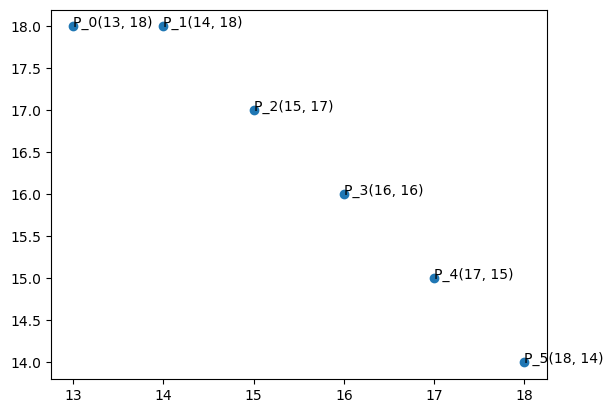

In [47]:
points = np.array([[13, 18],
                   [14, 18],
                   [15, 17],
                   [16, 16],
                   [17, 15],
                   [18, 14]])

# Graficar puntos en un plano
plt.scatter(points[:, 0], points[:, 1])
for i, txt in enumerate(points):
    plt.annotate(f'P_{i}({txt[0]}, {txt[1]})', (txt[0], txt[1]))


#### Interpolación de Lagrange
$P(x)$ para los puntos $ (x_i, y_i) d$ definimos $P(x) = \sum_{i=0}^{n} y_i \ell_i(x)$ y los polinomios base $ \ell_i(x) d$ son $\ell_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}$

Calcular los puntos 

- Para $ i = 0$, $P_0(13, 18)$ es $\ell_0(x) = \left(\frac{x - 14}{13 - 14}\right) \left(\frac{x - 15}{13 - 15}\right) \left(\frac{x - 16}{13 - 16}\right) \left(\frac{x - 17}{13 - 17}\right) \left(\frac{x - 18}{13 - 18}\right)$

- Para $ i = 1 $ $P_1(14,18)$ es $\ell_1(x) = \left(\frac{x - 13}{14 - 13}\right) \left(\frac{x - 15}{14 - 15}\right) \left(\frac{x - 16}{14 - 16}\right) \left(\frac{x - 17}{14 - 17}\right) \left(\frac{x - 18}{14 - 18}\right)$

- Para $i = 2 $  $P_2(15, 17)$ es $\ell_2(x) = \left(\frac{x - 13}{15 - 13}\right) \left(\frac{x - 14}{15 - 14}\right) \left(\frac{x - 16}{15 - 16}\right) \left(\frac{x - 17}{15 - 17}\right) \left(\frac{x - 18}{15 - 18}\right)$

- Para $i = 3 $ $P_3(16, 16)$ es $ \ell_3(x) = \left(\frac{x - 13}{16 - 13}\right) \left(\frac{x - 14}{16 - 14}\right) \left(\frac{x - 15}{16 - 15}\right) \left(\frac{x - 17}{16 - 17}\right) \left(\frac{x - 18}{16 - 18}\right)$

- Para $i = 4 $ $P_4(17, 15)$ es $\ell_4(x) = \left(\frac{x - 13}{17 - 13}\right) \left(\frac{x - 14}{17 - 14}\right) \left(\frac{x - 15}{17 - 15}\right) \left(\frac{x - 16}{17 - 16}\right) \left(\frac{x - 18}{17 - 18}\right)$

- Para $i = 5 $ $P_5(18, 14)$ es $\ell_5(x) = \left(\frac{x - 13}{18 - 13}\right) \left(\frac{x - 14}{18 - 14}\right) \left(\frac{x - 15}{18 - 15}\right) \left(\frac{x - 16}{18 - 16}\right) \left(\frac{x - 17}{18 - 17}\right)$


Construir Polinomio $ P(x) $

$
P(x) = 18\left(\frac{x - 14}{13 - 14}\right)\left(\frac{x - 15}{13 - 15}\right)\left(\frac{x - 16}{13 - 16}\right)\left(\frac{x - 17}{13 - 17}\right)\left(\frac{x - 18}{13 - 18}\right) + 18\left(\frac{x - 13}{14 - 13}\right)\left(\frac{x - 15}{14 - 15}\right)\left(\frac{x - 16}{14 - 16}\right)\left(\frac{x - 17}{14 - 17}\right)\left(\frac{x - 18}{14 - 18}\right)  + 17\left(\frac{x - 13}{15 - 13}\right)\left(\frac{x - 14}{15 - 14}\right)\left(\frac{x - 16}{15 - 16}\right)\left(\frac{x - 17}{15 - 17}\right)\left(\frac{x - 18}{15 - 18}\right) + 16\left(\frac{x - 13}{16 - 13}\right)\left(\frac{x - 14}{16 - 14}\right)\left(\frac{x - 15}{16 - 15}\right)\left(\frac{x - 17}{16 - 17}\right)\left(\frac{x - 18}{16 - 18}\right)  + 15\left(\frac{x - 13}{17 - 13}\right)\left(\frac{x - 14}{17 - 14}\right)\left(\frac{x - 15}{17 - 15}\right)\left(\frac{x - 16}{17 - 16}\right)\left(\frac{x - 18}{17 - 18}\right) + 14\left(\frac{x - 13}{18 - 13}\right)\left(\frac{x - 14}{18 - 14}\right)\left(\frac{x - 15}{18 - 15}\right)\left(\frac{x - 16}{18 - 16}\right)\left(\frac{x - 17}{18 - 17}\right)
$





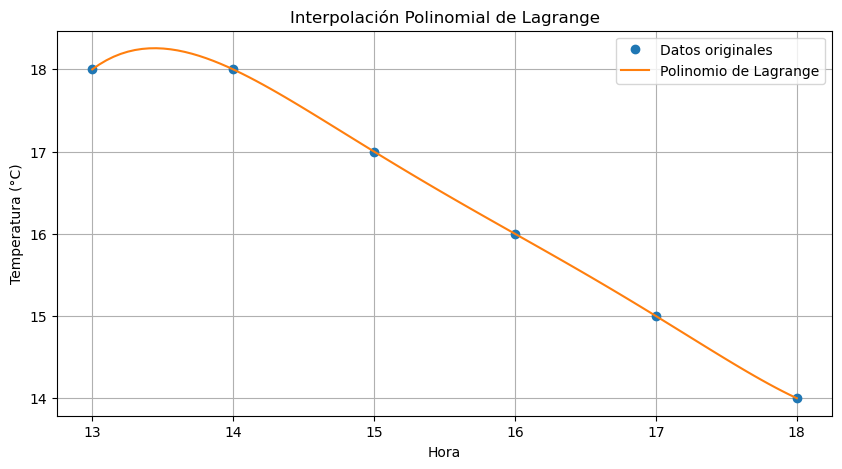

El polinomio interpolador de Lagrange es:
 18*(18/5 - x/5)*(17/4 - x/4)*(16/3 - x/3)*(15/2 - x/2)*(14 - x) + 18*(9/2 - x/4)*(17/3 - x/3)*(8 - x/2)*(15 - x)*(x - 13) + 17*(6 - x/3)*(17/2 - x/2)*(16 - x)*(x/2 - 13/2)*(x - 14) + 16*(9 - x/2)*(17 - x)*(x/3 - 13/3)*(x/2 - 7)*(x - 15) + 15*(18 - x)*(x/4 - 13/4)*(x/3 - 14/3)*(x/2 - 15/2)*(x - 16) + 14*(x/5 - 13/5)*(x/4 - 7/2)*(x/3 - 5)*(x/2 - 8)*(x - 17)


In [48]:
x = sp.symbols('x')

# Definir los puntos de datos
x_points = np.array([13, 14, 15, 16, 17, 18])
y_points = np.array([18, 18, 17, 16, 15, 14])

# Función para calcular el polinomio base de Lagrange
def lagrange_base(x, i, x_points):
    term = 1
    for j in range(len(x_points)):
        if j != i:
            term *= (x - x_points[j]) / (x_points[i] - x_points[j])
    return term

# Función para calcular el polinomio interpolador de Lagrange
def lagrange_interpolator(x, x_points, y_points):
    p = 0
    for i in range(len(x_points)):
        p += y_points[i] * lagrange_base(x, i, x_points)
    return p

# Generar valores x para la visualización
x_vals = np.linspace(min(x_points), max(x_points), 100)
y_vals = [lagrange_interpolator(xi, x_points, y_points) for xi in x_vals]

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(x_points, y_points, 'o', label='Datos originales')
plt.plot(x_vals, y_vals, '-', label='Polinomio de Lagrange')
plt.title('Interpolación Polinomial de Lagrange')
plt.xlabel('Hora')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

print("El polinomio interpolador de Lagrange es:\n",lagrange_interpolator(x, x_points, y_points) )

### Interpolación de Newton

##### Tabla:


\begin{array}{c|cccccc}
x_i & f[x_i] & f[\cdot, \cdot] & f[\cdot, \cdot, \cdot] & f[\cdot, \cdot, \cdot, \cdot] & f[\cdot, \cdot, \cdot, \cdot, \cdot] & f[\cdot, \cdot, \cdot, \cdot, \cdot, \cdot] \\
\hline
13  & 18    &       &       &       &       &       \\
14  & 18    & 0     &       &       &       &       \\
15  & 17    & -1    & 0.5   &       &       &       \\
16  & 16    & -1    & 0     & -0.17 &       &       \\
17  & 15    & -1    & 0     & 0     & 0.056 &       \\
18  & 14    & -1    & 0     & 0     & 0     & -0.014 \\
\end{array}

- $a_0 = f[x_0] = 18 $
- $a_1 = f[x_0, x_1] = 0 $
- $a_2 = f[x_0, x_1, x_2] = 0.5 $
- $a_3 = f[x_0, x_1, x_2, x_3] = -0.17 $
- $a_4 = f[x_0, x_1, x_2, x_3, x_4] = 0.056 $
- $a_5 = f[x_0, x_1, x_2, x_3, x_4, x_5] = -0.014 $

#### Polinomio Interpolador de Newton

$
P(x) = 18 + 0(x - 13) + 0.5(x - 13)(x - 14) - 0.17(x - 13)(x - 14)(x - 15) + 0.056(x - 13)(x - 14)(x - 15)(x - 16) - 0.014(x - 13)(x - 14)(x - 15)(x - 16)(x - 17)
$



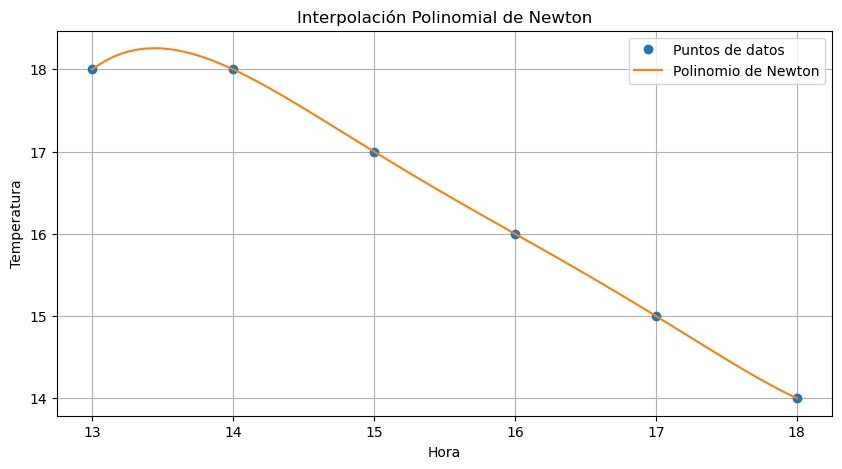

El polinomio interpolador de Newton es:
 18.00 + 0.00(x - 13) + -0.50(x - 13)(x - 14) + 0.17(x - 13)(x - 14)(x - 15) + -0.04(x - 13)(x - 14)(x - 15)(x - 16) + 0.01(x - 13)(x - 14)(x - 15)(x - 16)(x - 17)


In [49]:
x = sp.symbols('x')
# Datos de los puntos
x = np.array([13, 14, 15, 16, 17, 18])
y = np.array([18, 18, 17, 16, 15, 14])

# Función para calcular los coeficientes de diferencias divididas
def divided_differences(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1, n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
            
    return coef[0, :]

# Función para evaluar el polinomio en un punto
def newton_polynomial(coef, x_data, x):
    n = len(coef)
    p = coef[-1]
    for k in range(1, n):
        p = coef[-k-1] + (x - x_data[-k-1]) * p
    return p

# Printear el polinomio de Newton
def print_newton_polynomial(coef, x_data):
    n = len(coef)
    polynomial = f"{coef[0]:.2f}"
    term = ""
    for i in range(1, n):
        term += f"(x - {x_data[i-1]})"
        polynomial += f" + {coef[i]:.2f}{term}"
    return polynomial

# Coeficientes de diferencias divididas
coefficients = divided_differences(x, y)

# Evaluar el polinomio en un rango de valores
x_vals = np.linspace(min(x), max(x), 100)
y_vals = [newton_polynomial(coefficients, x, xi) for xi in x_vals]

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='Puntos de datos')
plt.plot(x_vals, y_vals, label='Polinomio de Newton')
plt.title('Interpolación Polinomial de Newton')
plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()

print("El polinomio interpolador de Newton es:\n",print_newton_polynomial(coefficients, x) )

## Punto 3: Aproximación de derivadas

Sea $f(x) = \sin(x)$, con $x$ en radianes.


1. Calcular aproximaciones a $f'(0.8)$ usando la fórmula de diferencias centrales tomando $h = 0.1$ y $h = 0.01$.
2. Comparar los resultados obtenidos con $f'(0.8) = \cos(0.8)$.

Parte 1:

In [50]:
# Definir la función
def f(x):
    return x**2

# Derivadas numéricas
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def exact_derivative(x):
    return np.cos(x)


# Punto de interés y paso
x = 0.8
h1 = 0.1

# Imprimir resultados
print("------------------------------------\n Para h:", h)
print(f"Diferencias hacia adelante: f'({x}) ≈ {forward_difference(f, x, h1)}")
print(f"Diferencias hacia atrás: f'({x}) ≈ {backward_difference(f, x, h1)}")
print(f"Diferencias centradas: f'({x}) ≈ {central_difference(f, x, h1)}")

h2 = 0.01
print("------------------------------------\n Para h:", h)
# Calcular las derivadas
print(f"Diferencias hacia adelante: f'({x}) ≈ {forward_difference(f, x, h2)}")
print(f"Diferencias hacia atrás: f'({x}) ≈ {backward_difference(f, x, h2)}")
print(f"Diferencias centradas: f'({x}) ≈ {central_difference(f, x, h2)}")

------------------------------------
 Para h: 0.01
Diferencias hacia adelante: f'(0.8) ≈ 1.6999999999999993
Diferencias hacia atrás: f'(0.8) ≈ 1.5000000000000002
Diferencias centradas: f'(0.8) ≈ 1.5999999999999996
------------------------------------
 Para h: 0.01
Diferencias hacia adelante: f'(0.8) ≈ 1.6100000000000003
Diferencias hacia atrás: f'(0.8) ≈ 1.5900000000000025
Diferencias centradas: f'(0.8) ≈ 1.6000000000000014


Parte 2:

In [51]:

# Calcular la derivada exacta
exact_value = exact_derivative(x)

# Imprimir resultados
print(f"Diferencias centradas con h = {h1}: f'(0.8) ≈ {central_difference(f, 0.8, h1)}")
print(f"Diferencias centradas con h = {h2}: f'(0.8) ≈ {central_difference(f, 0.8, h2)}")
print(f"Derivada exacta: f'(0.8) = {exact_value}")

# Comparar errores
error_h1 = abs(exact_value - approx_derivative_h1)
error_h2 = abs(exact_value - approx_derivative_h2)

print(f"Error con h = {h1}: {error_h1}")
print(f"Error con h = {h2}: {error_h2}")


Diferencias centradas con h = 0.1: f'(0.8) ≈ 1.5999999999999996
Diferencias centradas con h = 0.01: f'(0.8) ≈ 1.6000000000000014
Derivada exacta: f'(0.8) = 0.6967067093471654
Error con h = 0.1: 0.0011605973982039552
Error con h = 0.01: 1.1611720428184036e-05


## Punto 4: Aproximación de derivadas para funciones complejas

Usar las diferencias hacia adelante, hacia atrás y centrales para aproximar la derivada de cada una de las siguientes funciones en el punto dado, usando varios valores de $h$.

**Funciones:**
1. $f(x) = 60x^{45} - 32x^{33} + 233x^5 - 47x^2 - 77$, en $x = \frac{1}{\sqrt{3}}$.
2. $f(x) = \tan\left(\cos\left(\sqrt{5}+\sin(x)\right)/(1+x^2)\right)$, en $x = 1 + \frac{\sqrt{5}}{3}$.
